In [56]:
#Product Recommendation System for e-commerce businesses¶
#A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.
#The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

# recommendation system is designed in 3 parts based on the business context:

#Recommendation system part I: Product pupularity based system targetted at new customers

#Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

#Recommendation system part III: When a business is setting up its e-commerce website for the first time withou any product rating

#When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques

#Recommendation System - Part 
#Product popularity based recommendation system targeted at new customers
#Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.
#Dataset : Amazon product review dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn 
from sklearn.decomposition import TruncatedSVD

In [4]:
amazon_rating=pd.read_csv("ratings_Beauty.csv")
amazon_rating=amazon_rating.dropna()
amazon_rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [6]:
amazon_rating.shape

(2023070, 4)

In [9]:
popular_products=pd.DataFrame(amazon_rating.groupby('ProductId')['Rating'].count())
most_popular=popular_products.sort_values('Rating',ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

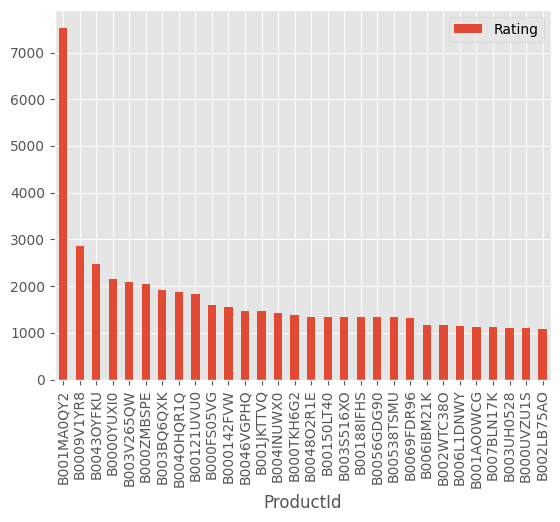

In [10]:
most_popular.head(30).plot(kind='bar')

In [ ]:
#Analysis:

#The above graph gives us the most popular products (arranged in descending order) sold by the business.

#For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

#Recommendation System - Part II
#Model-based collaborative filtering system
#Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
#A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.
#Utility Matrix based on products sold and user reviews
#Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [11]:
amazon_rating1=amazon_rating.head(10000)

In [15]:
ratings_utility_matrix=amazon_rating1.pivot_table(values='Rating',index='UserId',columns='ProductId',fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
ratings_utility_matrix.shape

(9697, 886)

In [18]:
X=ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X.shape

(886, 9697)

In [21]:
x1=X

In [22]:
svd=TruncatedSVD(n_components=10)
decompsed_matrix=svd.fit_transform(X)
decompsed_matrix.shape

(886, 10)

In [24]:
correlation_matrix=np.corrcoef(decompsed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
#correlation_matrix

#Isolating Product ID # 6117036094 from the Correlation Matrix
#Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [25]:
X.index[99]

'6117036094'

In [ ]:
#Index # of product ID purchased by customer

In [26]:
i='6117036094'
product_names=list(X.index)
product_ID=product_names.index(i)
product_ID

99

In [ ]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [27]:
correlation_product_ID=correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
#Recommending top 10 highly correlated products in sequence

In [28]:
recommend=list(X.index[correlation_product_ID> 0.90])
recommend.remove(i)
recommend[0:9]

['0737104473',
 '1304139212',
 '1304139220',
 '130414643X',
 '130414674X',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046']

In [ ]:
#Recommendation System - Part III
#For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
#Dataset : Home Depot's dataset with product dataset.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [30]:
product_description=pd.read_csv('product_descriptions.csv')
product_description.shape

(124428, 2)

In [31]:
product_description=product_description.dropna()
product_description.shape
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [33]:
product_description1=product_description.head(500)
product_description1['product_description'].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [35]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_description1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

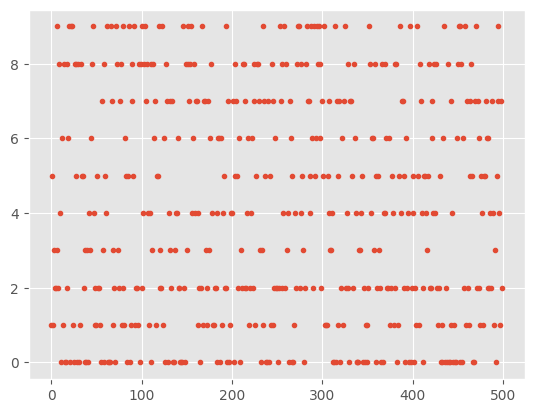

In [36]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [37]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
#Output
#Recommendation of product based on the current product selected by user.
#To recommend related product based on, Frequently bought together.
#Top words in each cluster based on product description

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the input data
vectorizer = TfidfVectorizer(max_features=8932)  # Adjust the max_features if needed
x1 = vectorizer.fit_transform(product_description1["product_description"])  # Replace 'data' with your text dataset

# Train the KMeans model
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x1)

# Print top terms per cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use the updated method

for i in range(true_k):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:  # Adjust '10' to display a different number of terms
        if ind < len(terms):  # Prevent out-of-bounds errors
            print(f" {terms[ind]}")


Top terms per cluster:
Cluster 0:
 landscape
 pavestone
 and
 shower
 curved
 pallet
 walls
 rumblestone
 setback
 aligning
Cluster 1:
 and
 in
 for
 to
 the
 or
 is
 of
 with
 be
Cluster 2:
 and
 the
 light
 for
 to
 in
 led
 watt
 you
 tool
Cluster 3:
 and
 the
 in
 for
 collection
 with
 patio
 to
 your
 frame
Cluster 4:
 in
 the
 to
 and
 for
 of
 window
 with
 your
 or
Cluster 5:
 insulation
 and
 the
 radiant
 attic
 in
 to
 of
 fiberglass
 ecotouch
Cluster 6:
 and
 for
 the
 in
 to
 with
 of
 metal
 20
 power
Cluster 7:
 air
 the
 and
 to
 cooling
 fan
 for
 your
 with
 you
Cluster 8:
 and
 the
 to
 for
 with
 in
 up
 you
 of
 is
Cluster 9:
 water
 the
 and
 to
 in
 for
 of
 with
 toilet
 easy


In [47]:
def show_recommendation(product):
    Y=vectorizer.transform([product])
    prediction=model.predict(Y)
    print_cluster(prediction[0])

In [48]:
show_recommendation("cutting tool")

Cluster 6:
 and
 for
 the
 in
 to
 with
 of
 metal
 20
 power


In [49]:
show_recommendation("spray paint")

Cluster 4:
 in
 the
 to
 and
 for
 of
 window
 with
 your
 or


In [51]:
show_recommendation("steel drill")


Cluster 6:
 and
 for
 the
 in
 to
 with
 of
 metal
 20
 power


In [53]:
show_recommendation("water")

Cluster 9:
 water
 the
 and
 to
 in
 for
 of
 with
 toilet
 easy


In [54]:
#Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

#Summary:
#This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.